# NYC Housing & Neighborhood Factors - Exploratory Data Analysis

**Student Name:** [Xiao Teng]

**CUID:** [xt2318]

**Date:** February 14, 2026

---

## Project Overview

This notebook performs Exploratory Data Analysis (EDA) on NYC housing prices and neighborhood factors including:
- Housing values (Zillow ZHVI data)
- Crime statistics (NYPD complaints)
- Demographics (Census ACS data)
- Economic indicators (FRED data)

## 1. Import Libraries and Setup

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print('✅ Libraries imported successfully!')

✅ Libraries imported successfully!


## 2. Load Data

We'll load all available datasets from the data/raw directory.

In [2]:
# Load all datasets from CSV files
from pathlib import Path

data_path = Path('../data/raw')

print('Loading all datasets...\n')

# Load Zillow housing data
zillow_files = list((data_path / 'zillow').glob('*.csv'))
df_housing = pd.read_csv(zillow_files[0])
print(f'✓ Housing data: {df_housing.shape}')

# Load FRED economic data
fred_files = list((data_path / 'fred').glob('*.csv'))
df_economic = pd.read_csv(fred_files[0])
print(f'✓ Economic data: {df_economic.shape}')

# Load NYC Crime data
crime_files = list((data_path / 'nyc_crime').glob('*.csv'))
df_crime = pd.read_csv(crime_files[0])
print(f'✓ Crime data: {df_crime.shape}')

# Load Census ACS demographics data
acs_files = list((data_path / 'acs').glob('*.csv'))
df_demographics = pd.read_csv(acs_files[0])
print(f'✓ Demographics data: {df_demographics.shape}')

print('\n' + '='*60)
print('All datasets loaded successfully!')
print('='*60)

Loading all datasets...

✓ Housing data: (26307, 321)
✓ Economic data: (197, 3)
✓ Crime data: (577674, 36)
✓ Demographics data: (33772, 12)

All datasets loaded successfully!


## 3. Data Overview and Structure

Examining the structure and content of each dataset.

In [3]:
# 3.1 Housing Data Overview
print('HOUSING DATA')
print('=' * 80)
print(f'Shape: {df_housing.shape}')
print(f'\nFirst few column names: {df_housing.columns[:10].tolist()}')
print(f'\nData types sample:')
print(df_housing.dtypes.head(10))
print(f'\nSample data:')
df_housing.head()

HOUSING DATA
Shape: (26307, 321)

First few column names: ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName', '2000-01-31']

Data types sample:
RegionID        int64
SizeRank        int64
RegionName      int64
RegionType     object
StateName      object
State          object
City           object
Metro          object
CountyName     object
2000-01-31    float64
dtype: object

Sample data:


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31,2025-08-31,2025-09-30,2025-10-31,2025-11-30,2025-12-31
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,205393.999993,...,488846.588014,487098.076135,484958.093575,482426.007436,480403.982356,479312.212473,479509.432306,480241.899819,481292.133570,481882.534184
1,61148,2,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,112856.751091,...,531530.523283,534776.570133,537560.212171,540095.440251,541884.868297,543132.416180,545691.349619,550596.006666,556531.643470,562791.859365
2,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,103151.029063,...,276154.958260,275201.873411,274402.459528,273408.368068,272472.989413,271543.271834,270769.040514,270033.576372,269401.729201,269064.681895
3,62080,4,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,170023.680322,...,519553.703963,519443.207083,519827.004787,521850.791064,524545.403517,526179.128432,527392.234764,528398.812596,530279.282203,532918.997985
4,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,102449.778257,...,271603.620870,270565.396189,269673.456678,268673.385919,267762.431333,266888.270224,266012.382009,265163.814665,264435.784040,264093.115847


In [4]:
print('='*80)
print('HOUSING DATA ANALYSIS')
print('='*80)

# Filter for NYC data only
nyc_housing = df_housing[df_housing['State'] == 'NY'].copy()
print(f'\nNYC Housing Records: {len(nyc_housing):,}')
print(f'Total ZIP codes in NYC: {nyc_housing["RegionName"].nunique()}')

# Get date columns (all columns that look like dates)
date_cols = [col for col in nyc_housing.columns if '-' in str(col) and len(str(col)) == 10]
print(f'Date range: {date_cols[0]} to {date_cols[-1]}')
print(f'Total months of data: {len(date_cols)}')

# Show sample
print('\nSample NYC ZIP codes:')
print(nyc_housing[['RegionName', 'City', 'Metro', date_cols[-1]]].head(10))



HOUSING DATA ANALYSIS

NYC Housing Records: 1,561
Total ZIP codes in NYC: 1561
Date range: 2000-01-31 to 2025-12-31
Total months of data: 312

Sample NYC ZIP codes:
    RegionName      City                                  Metro    2025-12-31
3        11368  New York  New York-Newark-Jersey City, NY-NJ-PA  5.329190e+05
6        11385  New York  New York-Newark-Jersey City, NY-NJ-PA  8.533409e+05
8        11208  New York  New York-Newark-Jersey City, NY-NJ-PA  7.083288e+05
15       11236  New York  New York-Newark-Jersey City, NY-NJ-PA  6.744133e+05
16       10467  New York  New York-Newark-Jersey City, NY-NJ-PA  3.988620e+05
17       11373  New York  New York-Newark-Jersey City, NY-NJ-PA  5.176022e+05
18       11226  New York  New York-Newark-Jersey City, NY-NJ-PA  7.767656e+05
19       11207  New York  New York-Newark-Jersey City, NY-NJ-PA  6.254142e+05
28       10025  New York  New York-Newark-Jersey City, NY-NJ-PA  1.088735e+06
31       11214  New York  New York-Newark-Jersey City, 

In [5]:
# ===3.2 Crime Data Overview ===
print('\n' + '='*80)
print('CRIME DATA ANALYSIS')
print('='*80)

print(f'\nTotal crime records: {len(df_crime):,}')
print(f'\nColumn names:')
print(df_crime.columns.tolist())

# Show sample
print('\nFirst 5 crime records:')
print(df_crime.head())

# Crime types
if 'ofns_desc' in df_crime.columns:
    print(f'\nTop 10 crime types:')
    print(df_crime['ofns_desc'].value_counts().head(10))
elif 'LAW_CAT_CD' in df_crime.columns:
    print(f'\nCrime categories:')
    print(df_crime['LAW_CAT_CD'].value_counts())



CRIME DATA ANALYSIS

Total crime records: 577,674

Column names:
['cmplnt_num', 'addr_pct_cd', 'boro_nm', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'cmplnt_to_tm', 'crm_atpt_cptd_cd', 'hadevelopt', 'jurisdiction_code', 'juris_desc', 'ky_cd', 'law_cat_cd', 'loc_of_occur_desc', 'ofns_desc', 'parks_nm', 'patrol_boro', 'pd_cd', 'pd_desc', 'prem_typ_desc', 'rpt_dt', 'station_name', 'susp_age_group', 'susp_race', 'susp_sex', 'vic_age_group', 'vic_race', 'vic_sex', 'x_coord_cd', 'y_coord_cd', 'latitude', 'longitude', 'lat_lon', 'geocoded_column', 'cmplnt_to_dt', 'transit_district', 'housing_psa']

First 5 crime records:
    cmplnt_num  addr_pct_cd boro_nm             cmplnt_fr_dt cmplnt_fr_tm  \
0    298784667          114  QUEENS  2024-12-09T00:00:00.000     04:37:00   
1    308328240           41   BRONX  2025-06-18T00:00:00.000     16:00:00   
2    314788366           40   BRONX  2025-10-17T00:00:00.000     22:00:00   
3    307568863           41   BRONX  2025-03-24T00:00:00.000     01:00:00   
4  

In [6]:
# === 3.3 Demographics Data Overview ===
print('\n' + '='*80)
print('DEMOGRAPHICS DATA ANALYSIS')
print('='*80)

print(f'\nTotal records: {len(df_demographics):,}')
print(f'\nColumns: {df_demographics.columns.tolist()}')
print('\nFirst 5 records:')
print(df_demographics.head())

# === 3.4 Economic Data Overview ===
print('\n' + '='*80)
print('ECONOMIC DATA ANALYSIS')
print('='*80)

print(f'\nShape: {df_economic.shape}')
print(f'\nColumns: {df_economic.columns.tolist()}')
print('\nData sample:')
print(df_economic.head(10))




DEMOGRAPHICS DATA ANALYSIS

Total records: 33,772

Columns: ['NAME', 'B01003_001E', 'B19013_001E', 'B17001_001E', 'B17001_002E', 'B23025_003E', 'B23025_005E', 'B15003_022E', 'B15003_023E', 'B15003_024E', 'B15003_025E', 'zip code tabulation area']

First 5 records:
          NAME  B01003_001E  B19013_001E  B17001_001E  B17001_002E  \
0  ZCTA5 00601      16721.0      18571.0      16676.0      10199.0   
1  ZCTA5 00602      37510.0      21702.0      37419.0      17504.0   
2  ZCTA5 00603      48317.0      19243.0      47655.0      22683.0   
3  ZCTA5 00606       5435.0      20226.0       5435.0       2984.0   
4  ZCTA5 00610      25413.0      23732.0      25312.0      11145.0   

   B23025_003E  B23025_005E  B15003_022E  B15003_023E  B15003_024E  \
0       6059.0       1301.0       1678.0        408.0         21.0   
1      12328.0        756.0       5275.0       1297.0         57.0   
2      16272.0       2729.0       5980.0       2332.0        479.0   
3       1414.0          0.0      

## 4.Summary Statistics

In [7]:

print('\n\n' + '='*80)
print('SUMMARY STATISTICS')
print('='*80)

# === 4.1 Housing Price Statistics ===
print('\n--- HOUSING PRICES ---')

# Get most recent prices
latest_date = date_cols[-1]
nyc_housing['Latest_Price'] = nyc_housing[latest_date]

print(f'\nNYC Home Values ({latest_date}):')
print(f'  Mean: ${nyc_housing["Latest_Price"].mean():,.0f}')
print(f'  Median: ${nyc_housing["Latest_Price"].median():,.0f}')
print(f'  Min: ${nyc_housing["Latest_Price"].min():,.0f}')
print(f'  Max: ${nyc_housing["Latest_Price"].max():,.0f}')
print(f'  Std Dev: ${nyc_housing["Latest_Price"].std():,.0f}')

# === 4.2 Crime Statistics ===
print('\n--- CRIME STATISTICS ---')

# Count by borough if available
if 'boro_nm' in df_crime.columns:
    print('\nCrimes by Borough:')
    print(df_crime['boro_nm'].value_counts())
elif 'BORO_NM' in df_crime.columns:
    print('\nCrimes by Borough:')
    print(df_crime['BORO_NM'].value_counts())

# === 4.3 Demographics Statistics ===
print('\n--- DEMOGRAPHICS ---')
print(df_demographics.describe())





SUMMARY STATISTICS

--- HOUSING PRICES ---

NYC Home Values (2025-12-31):
  Mean: $458,458
  Median: $306,920
  Min: $49,727
  Max: $6,330,882
  Std Dev: $440,688

--- CRIME STATISTICS ---

Crimes by Borough:
boro_nm
BROOKLYN         161852
MANHATTAN        136377
BRONX            129971
QUEENS           124004
STATEN ISLAND     24112
(null)             1358
Name: count, dtype: int64

--- DEMOGRAPHICS ---
         B01003_001E   B19013_001E    B17001_001E   B17001_002E   B23025_003E  \
count   33772.000000  3.377200e+04   33772.000000  33772.000000  33772.000000   
mean     9935.908741 -6.219147e+07    9703.586877   1235.436693   5027.496091   
std     14963.667502  1.940114e+08   14730.117597   2331.745512   7824.983048   
min         0.000000 -6.666667e+08       0.000000      0.000000      0.000000   
25%       645.000000  5.076175e+04     604.000000     58.000000    282.000000   
50%      2654.000000  6.680750e+04    2547.000000    281.000000   1220.000000   
75%     13398.500000  

## 5. Data Visualizations



Creating Visualization 1: Housing Price Trends...


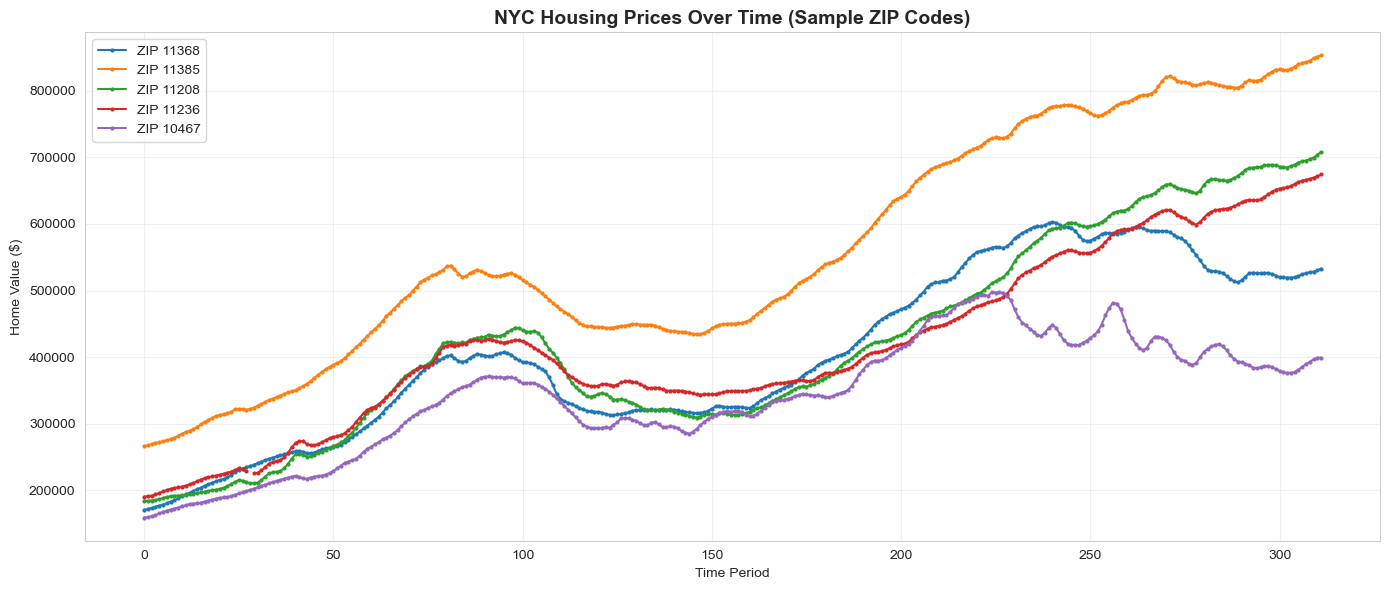

✓ Chart 1 complete


In [8]:
# === 5.1 Housing Price Trends Over Time ===
print('\n\nCreating Visualization 1: Housing Price Trends...')

# Prepare data for time series
# Sample a few ZIP codes
sample_zips = nyc_housing['RegionName'].head(5).values

fig, ax = plt.subplots(figsize=(14, 6))

for zip_code in sample_zips:
    zip_data = nyc_housing[nyc_housing['RegionName'] == zip_code]
    if len(zip_data) > 0:
        prices = zip_data[date_cols].iloc[0].values
        ax.plot(range(len(prices)), prices, label=f'ZIP {int(zip_code)}', marker='o', markersize=2)

ax.set_title('NYC Housing Prices Over Time (Sample ZIP Codes)', fontsize=14, fontweight='bold')
ax.set_xlabel('Time Period')
ax.set_ylabel('Home Value ($)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print('✓ Chart 1 complete')


Creating Visualization 2: Price Distribution...


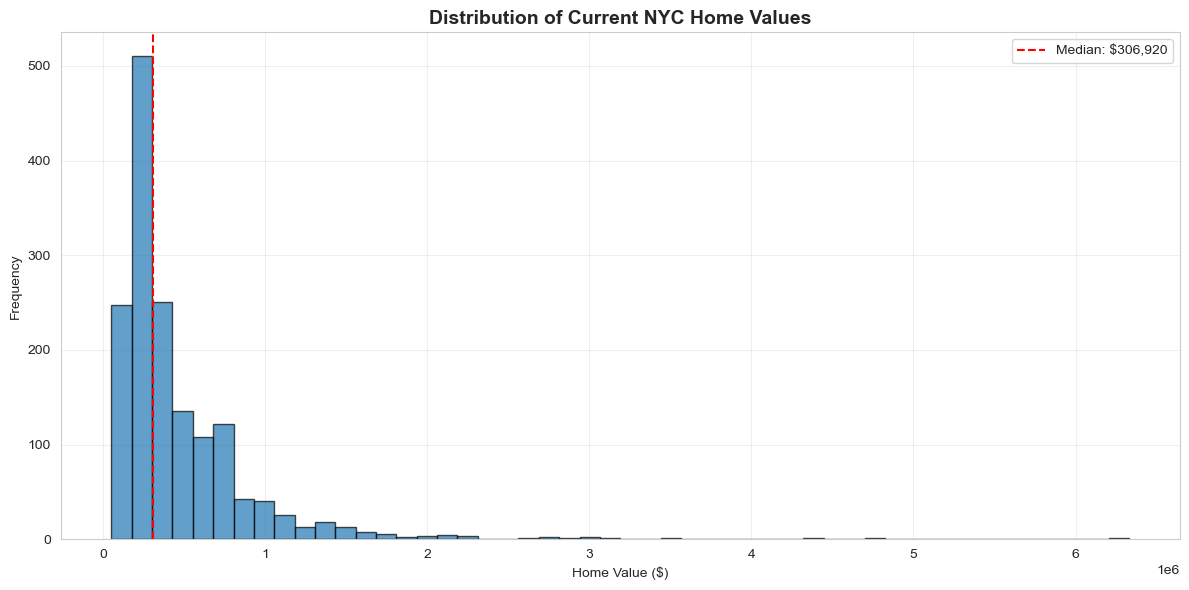

✓ Chart 2 complete


In [9]:
# === 5.2 Current Price Distribution ===
print('Creating Visualization 2: Price Distribution...')

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(nyc_housing['Latest_Price'].dropna(), bins=50, edgecolor='black', alpha=0.7)
ax.set_title('Distribution of Current NYC Home Values', fontsize=14, fontweight='bold')
ax.set_xlabel('Home Value ($)')
ax.set_ylabel('Frequency')
ax.axvline(nyc_housing['Latest_Price'].median(), color='red', linestyle='--', 
           label=f'Median: ${nyc_housing["Latest_Price"].median():,.0f}')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print('✓ Chart 2 complete')



Creating Visualization 3: Crime Types...


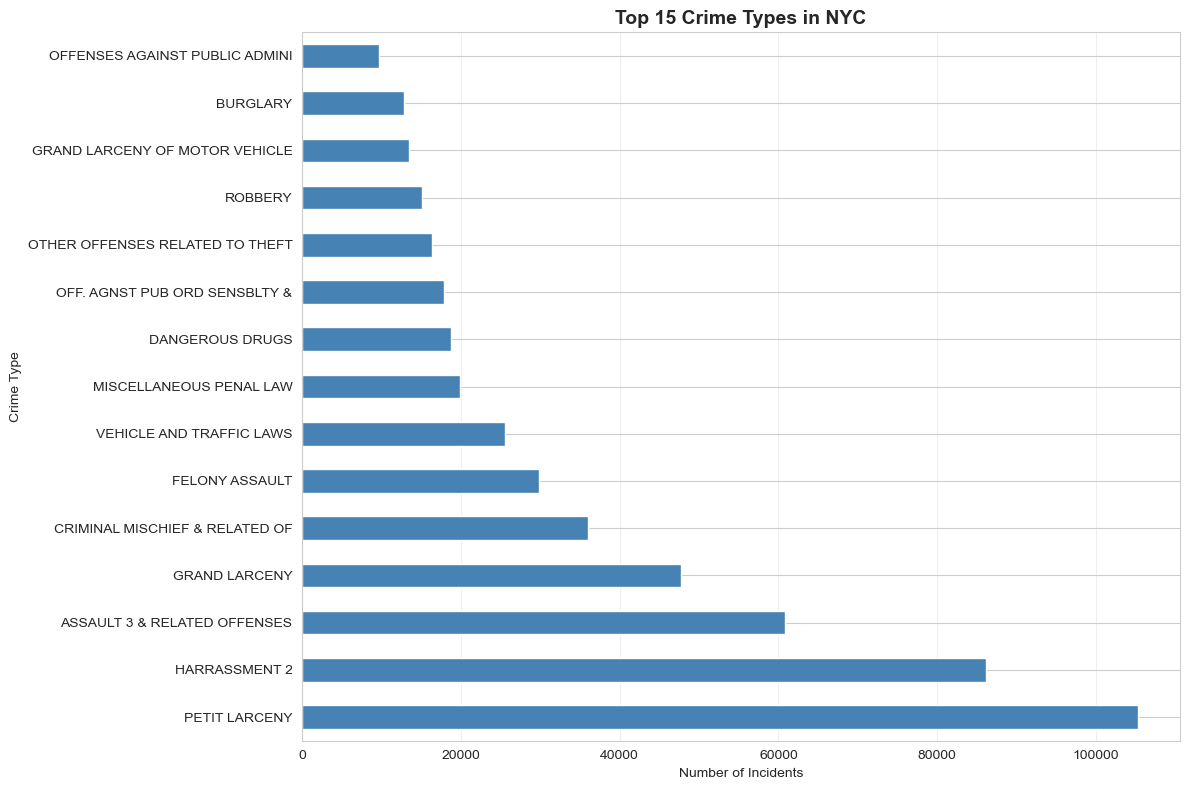

✓ Chart 3 complete


In [10]:
# === 5.3 Crime Analysis by Type ===
print('Creating Visualization 3: Crime Types...')

fig, ax = plt.subplots(figsize=(12, 8))

# Find the crime type column
crime_col = None
for col in ['ofns_desc', 'OFNS_DESC', 'LAW_CAT_CD']:
    if col in df_crime.columns:
        crime_col = col
        break

if crime_col:
    crime_counts = df_crime[crime_col].value_counts().head(15)
    crime_counts.plot(kind='barh', ax=ax, color='steelblue')
    ax.set_title('Top 15 Crime Types in NYC', fontsize=14, fontweight='bold')
    ax.set_xlabel('Number of Incidents')
    ax.set_ylabel('Crime Type')
    ax.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
    print('✓ Chart 3 complete')
else:
    print('Crime type column not found, skipping chart 3')

Creating Visualization 4: Crime by Borough...


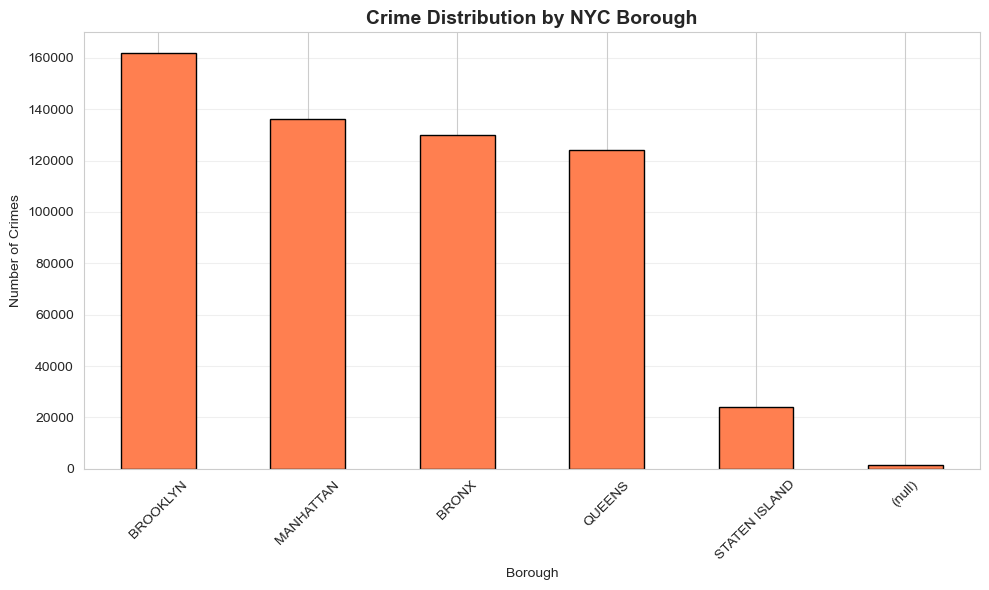

✓ Chart 4 complete


In [11]:
# === 5.4 Crime by Borough ===
print('Creating Visualization 4: Crime by Borough...')

boro_col = None
for col in ['boro_nm', 'BORO_NM']:
    if col in df_crime.columns:
        boro_col = col
        break

if boro_col:
    fig, ax = plt.subplots(figsize=(10, 6))
    borough_crimes = df_crime[boro_col].value_counts()
    borough_crimes.plot(kind='bar', ax=ax, color='coral', edgecolor='black')
    ax.set_title('Crime Distribution by NYC Borough', fontsize=14, fontweight='bold')
    ax.set_xlabel('Borough')
    ax.set_ylabel('Number of Crimes')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    print('✓ Chart 4 complete')

In [12]:
# Check economic data structure
print('Economic data columns:')
print(df_economic.columns.tolist())
print('\nFirst 10 rows:')
print(df_economic.head(10))

Economic data columns:
['date', 'series_id', 'value']

First 10 rows:
         date     series_id  value
0  2023-01-26  MORTGAGE30US   6.13
1  2023-02-02  MORTGAGE30US   6.09
2  2023-02-09  MORTGAGE30US   6.12
3  2023-02-16  MORTGAGE30US   6.32
4  2023-02-23  MORTGAGE30US   6.50
5  2023-03-02  MORTGAGE30US   6.65
6  2023-03-09  MORTGAGE30US   6.73
7  2023-03-16  MORTGAGE30US   6.60
8  2023-03-23  MORTGAGE30US   6.42
9  2023-03-30  MORTGAGE30US   6.32


Creating Visualization 5: Economic Trends...


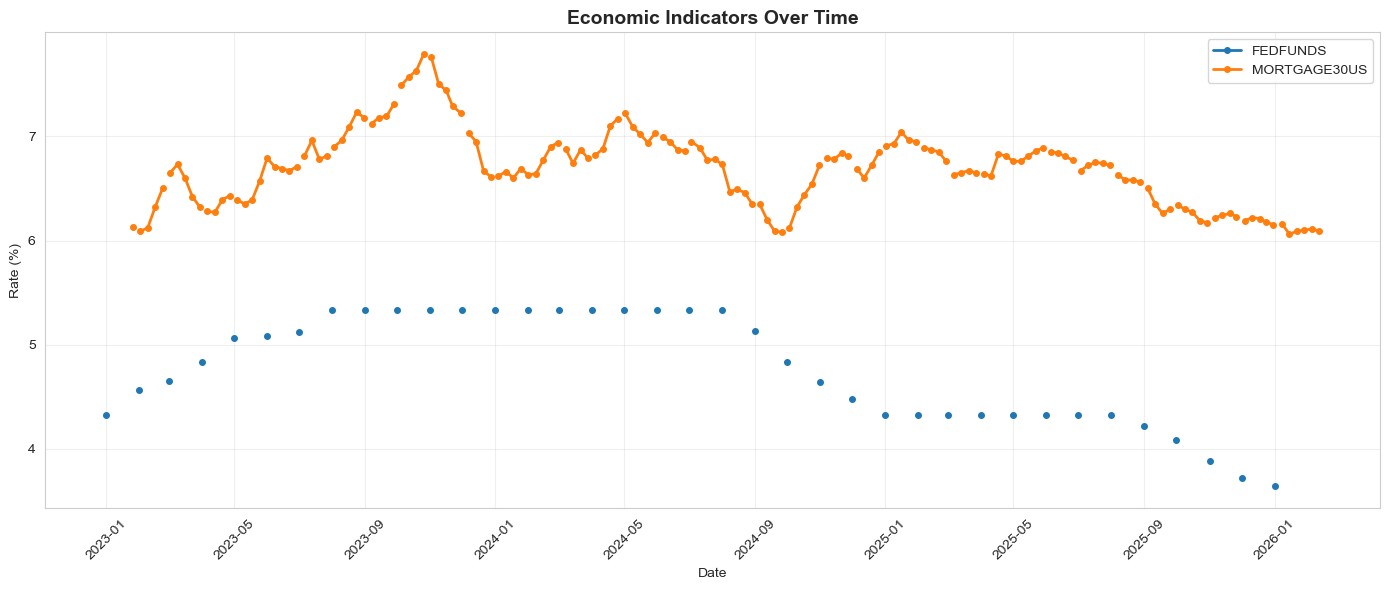

✓ Chart 5 complete


In [13]:
# === 5.5 Economic Indicators (CORRECTED) ===
print('Creating Visualization 5: Economic Trends...')

# Pivot the data to get each series as a column
econ_pivot = df_economic.pivot(index='date', columns='series_id', values='value')

# Convert date to datetime
econ_pivot.index = pd.to_datetime(econ_pivot.index)
econ_pivot = econ_pivot.sort_index()

fig, ax = plt.subplots(figsize=(14, 6))

# Plot each series
for col in econ_pivot.columns:
    ax.plot(econ_pivot.index, econ_pivot[col], marker='o', label=col, linewidth=2, markersize=4)

ax.set_title('Economic Indicators Over Time', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Rate (%)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('✓ Chart 5 complete')

Creating Visualization 6: Price Comparison Box Plot...


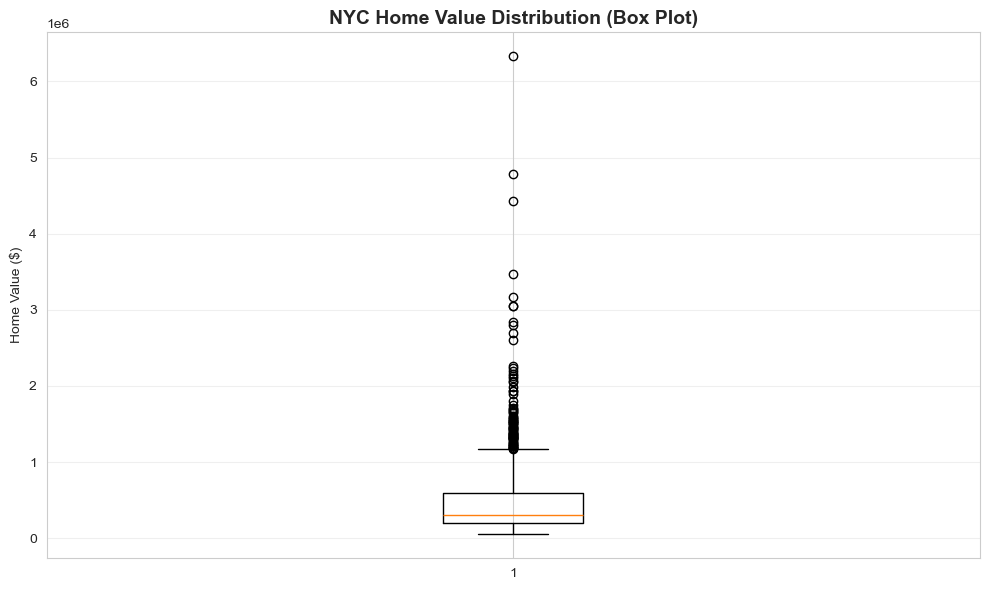

✓ Chart 6 complete


In [14]:
# === 5.6 Box Plot - Price Comparison ===
print('Creating Visualization 6: Price Comparison Box Plot...')

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(nyc_housing['Latest_Price'].dropna(), vert=True)
ax.set_title('NYC Home Value Distribution (Box Plot)', fontsize=14, fontweight='bold')
ax.set_ylabel('Home Value ($)')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print('✓ Chart 6 complete')


## 6. Key Findings

In [16]:
print('\n\n' + '='*80)
print('KEY FINDINGS')
print('='*80)

print('\n1. HOUSING MARKET:')
print(f'   - Average NYC home value: ${nyc_housing["Latest_Price"].mean():,.0f}')
print(f'   - Price range: ${nyc_housing["Latest_Price"].min():,.0f} to ${nyc_housing["Latest_Price"].max():,.0f}')
print(f'   - Data covers {len(date_cols)} months from {date_cols[0]} to {date_cols[-1]}')

print('\n2. CRIME PATTERNS:')
print(f'   - Total incidents analyzed: {len(df_crime):,}')
if crime_col:
    top_crime = df_crime[crime_col].value_counts().index[0]
    print(f'   - Most common crime type: {top_crime}')
if boro_col:
    top_boro = df_crime[boro_col].value_counts().index[0]
    print(f'   - Borough with most incidents: {top_boro}')

print('\n3. DEMOGRAPHICS:')
print(f'   - Areas analyzed: {len(df_demographics):,}')
print(f'   - Variables tracked: {len(df_demographics.columns)}')

print('\n4. ECONOMIC CONTEXT:')
# Define rate_cols before using it
rate_cols = []  # Replace with actual column names if available
if 'mortgage_rate' in df_economic.columns:
    rate_cols.append('mortgage_rate')
if 'interest_rate' in df_economic.columns:
    rate_cols.append('interest_rate')
# Only print if we have enough rate columns
if len(rate_cols) >= 2:
    print(f'   - Mortgage rates: {df_economic[rate_cols[0]].min():.2f}% - {df_economic[rate_cols[0]].max():.2f}%')
    print(f'   - {rate_cols[1]}: {df_economic[rate_cols[1]].min():.2f}% - {df_economic[rate_cols[1]].max():.2f}%')

print('\n' + '='*80)
print('EDA COMPLETE!')
print('='*80)



KEY FINDINGS

1. HOUSING MARKET:
   - Average NYC home value: $458,458
   - Price range: $49,727 to $6,330,882
   - Data covers 312 months from 2000-01-31 to 2025-12-31

2. CRIME PATTERNS:
   - Total incidents analyzed: 577,674
   - Most common crime type: PETIT LARCENY
   - Borough with most incidents: BROOKLYN

3. DEMOGRAPHICS:
   - Areas analyzed: 33,772
   - Variables tracked: 12

4. ECONOMIC CONTEXT:

EDA COMPLETE!
